<a href="https://colab.research.google.com/github/annisanurd/SQL/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',None)

In [ ]:
def get_result(query):
    conn = sqlite3.connect('olist.db')
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    conn.close()
    return data

def create_df(data, columns):
    return pd.DataFrame(data = data, columns = columns).drop(['index'], axis =1)

In [ ]:
olist_order_payments_dataset = create_df(get_result('select * from olist_order_payments_dataset'),
                                         ['index',
                                          'order_id',
                                          'payment_sequential',
                                          'payment_type',
                                          'payment_installments',
                                          'payment_value'
                                         ])
olist_order_dataset = create_df(get_result('select * from olist_order_dataset'),
                                ['index',
                                 'order_id',
                                 'customer_id',
                                 'order_status',
                                 'order_purchase_timestamp',
                                 'order_approved_at',
                                 'order_delivered_carrier_date',
                                 'order_delivered_customer_date',
                                 'order_estimated_delivery_date'
                                ])

olist_order_customer_dataset = create_df(get_result('select * from olist_order_customer_dataset'),
                                         ['index',
                                          'customers_id',
                                          'customers_uniq_id',
                                          'customer_zip_code_prefix',
                                          'customer_city',
                                          'customer_state'
                                         ])
olist_order_items_dataset = create_df(get_result('select * from olist_order_items_dataset'),
                                      ['index',
                                       'order_id',
                                       'order_item_id',
                                       'product_id',
                                       'seller_id',
                                       'shipping_limit_date',
                                       'price',
                                       'freight_value'
                                      ])
olist_products_dataset = create_df(get_result('select * from olist_products_dataset'),
                                   ['index',
                                    'product_id',
                                    'product_category_name',
                                    'product_name_length',
                                    'product_description_length',
                                    'product_photos_qty',
                                    'product_weight_g',
                                    'product_length_cm',
                                    'product_height_cm',
                                    'product_width_cm'
                                   ])
product_category_name_translation = create_df(get_result('select * from product_category_name_translation'),
                                             ['index',
                                              'product_category_name',
                                              'product_category_name_english'
                                             ])

In [ ]:
product = olist_products_dataset
order_item = olist_order_items_dataset
order = olist_order_dataset
payments = olist_order_payments_dataset
cust = olist_order_customer_dataset

In [ ]:
products = pd.merge(product, product_category_name_translation, on='product_category_name',how='left')


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_length            32341 non-null  float64
 3   product_description_length     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [ ]:
products[['product_category_name','product_category_name_english']][(products['product_category_name'].notnull()) & (products['product_category_name_english'].isnull())]


,product_category_name,product_category_name_english
1628,pc_gamer,NaN
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN
7325,portateis_cozinha_e_preparadores_de_alimentos,NaN
7478,pc_gamer,NaN
8819,portateis_cozinha_e_preparadores_de_alimentos,NaN
11039,portateis_cozinha_e_preparadores_de_alimentos,NaN
14266,portateis_cozinha_e_preparadores_de_alimentos,NaN
16182,portateis_cozinha_e_preparadores_de_alimentos,NaN
16930,pc_gamer,NaN
17800,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [ ]:
products.loc[products['product_category_name']=='pc_gamer','product_category_name_english'] = products.loc[products['product_category_name']=='pc_gamer','product_category_name_english'].fillna('pc_game')
products.loc[products['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos','product_category_name_english'] = products.loc[products['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos','product_category_name_english'].fillna('portable_kitchen_food_preparers')


In [ ]:
products[products['product_category_name_english']=='pc_game']


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,pc_game
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,pc_game
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,pc_game


In [ ]:
products.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_length            32341 non-null  float64
 3   product_description_length     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32341 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [ ]:
# Tabel Produk: Handling Missing Value
products.isna().sum()


product_id                         0
product_category_name            610
product_name_length              610
product_description_length       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    610
dtype: int64

In [ ]:
products = products.dropna()


In [ ]:
products.isna().sum()


product_id                       0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [ ]:
#Tabel Produk: Identifikasi Data Duplikat
products.duplicated().sum()

0

In [ ]:
products.head()


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
products = products.rename(columns={'product_category_name': 'product_category_name_portuguese'})
products = products.rename(columns={'product_category_name_english': 'product_category_name'})


In [ ]:
products.head()


,product_id,product_category_name_portuguese,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
#Tabel Produk: Identifikasi Inconsistent Format
pd.DataFrame(products['product_category_name'].value_counts()).head(73).reset_index().sort_values(by='index')

,index,product_category_name
44,agro_industry_and_commerce,74
29,air_conditioning,124
48,art,55
61,arts_and_craftmanship,19
47,audio,58
...,...,...
12,stationery,849
67,tablets_printing_image,9
9,telephony,1134
7,toys,1411


In [ ]:
#Tabel Item: Identifikasi Missing Value
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
#Tabel Item: Identifikasi Inconsistent Format
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#Tabel Item: Identifikasi Data Duplicate
order_item.duplicated().any()

False

In [ ]:
#Tabel Order: Identifikasi Inconsistent Format
order.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
#Tabel Order: Identifikasi Duplicate Data
order.duplicated().any()

False

In [ ]:
#Tabel Order: Identifikasi Missing Value
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order[order.order_status != 'delivered'].count()


order_id                         2963
customer_id                      2963
order_status                     2963
order_purchase_timestamp         2963
order_approved_at                2817
order_delivered_carrier_date     1182
order_delivered_customer_date       6
order_estimated_delivery_date    2963
dtype: int64

In [ ]:
order = order.dropna()
order = order[order['order_status']=='delivered']
order.nunique()

order_id                         96455
customer_id                      96455
order_status                         1
order_purchase_timestamp         95933
order_approved_at                88266
order_delivered_carrier_date     80094
order_delivered_customer_date    95643
order_estimated_delivery_date      445
dtype: int64

In [ ]:
#Tabel Order: Dates Data
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [ ]:
order[['order_purchase_timestamp',
      'order_approved_at',
      'order_delivered_carrier_date',
      'order_delivered_customer_date',
      'order_estimated_delivery_date']] = order[['order_purchase_timestamp',
                                                'order_approved_at',
                                                'order_delivered_carrier_date',
                                                'order_delivered_customer_date',
                                                'order_estimated_delivery_date']].apply(pd.to_datetime)
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
order = order[['order_id','customer_id','order_delivered_customer_date']]
order

,order_id,customer_id,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54


In [ ]:
#Tabel Payment: Identifikasi Missing Value
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
#Tabel Payment: Identifikasi Inconsistent Format
payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [ ]:
payments['payment_sequential'].unique()


array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [ ]:
payments['payment_type'].unique()


array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
payments['payment_installments'].unique()


array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [ ]:
#Tabel Payment: Identifikasi Data Duplicated
payments.duplicated().any()

False

In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
#Tabel Customer: Identifikasi Missing Value
cust.isna().sum()

customers_id                0
customers_uniq_id           0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#Tabel Customer: Identifikasi Inconsistent Format
cust.nunique()

customers_id                99441
customers_uniq_id           96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
cust['customer_city'].unique().tolist()


['franca',
 'sao bernardo do campo',
 'sao paulo',
 'mogi das cruzes',
 'campinas',
 'jaragua do sul',
 'timoteo',
 'curitiba',
 'belo horizonte',
 'montes claros',
 'rio de janeiro',
 'lencois paulista',
 'caxias do sul',
 'piracicaba',
 'guarulhos',
 'pacaja',
 'florianopolis',
 'aparecida de goiania',
 'santo andre',
 'goiania',
 'cachoeiro de itapemirim',
 'sao jose dos campos',
 'sao roque',
 'camacari',
 'resende',
 'sumare',
 'novo hamburgo',
 'sao luis',
 'sao jose',
 'santa barbara',
 'ribeirao preto',
 'ituiutaba',
 'taquarituba',
 'sao jose dos pinhais',
 'barrinha',
 'parati',
 'dourados',
 'trindade',
 'cascavel',
 'fortaleza',
 'brasilia',
 'pelotas',
 'porto alegre',
 'salto',
 'jundiai',
 'cacapava',
 'sao vicente',
 'uberlandia',
 'botelhos',
 'sao goncalo',
 'araucaria',
 'nova iguacu',
 'areia branca',
 'campos dos goytacazes',
 'sao carlos',
 'itajuba',
 'cruz das almas',
 'vassouras',
 'feira de santana',
 'niteroi',
 'sobral',
 'divinopolis',
 'paraiba do sul',
 '

In [ ]:
#Tabel Customer: Identifikasi Data Duplicated
cust.duplicated().any()

False

In [ ]:
cust.nunique()


customers_id                99441
customers_uniq_id           96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
cust['customers_uniq_id'].duplicated().any()

True

In [ ]:
#Analisis
#Objective 1: Perusahaan ingin mengetahui 5 Produk yang paling diminati/paling banyak diorder.
#Kita bisa menghitung jumlah kemunculan product_id pada tabel order_items

most_item = order_item

In [ ]:
most_item = pd.DataFrame(most_item['product_id'].value_counts())


In [ ]:
most_item = most_item.nlargest(5,'product_id').reset_index()


In [ ]:
most_item

,index,product_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388


In [ ]:
most_item = most_item.rename(columns={'product_id': 'product_id_count'})
most_item = most_item.rename(columns={'index': 'product_id'})

In [ ]:
most_item = pd.merge(most_item,products,on='product_id',how='left')


In [ ]:
most_item = most_item[['product_id','product_id_count','product_category_name']]


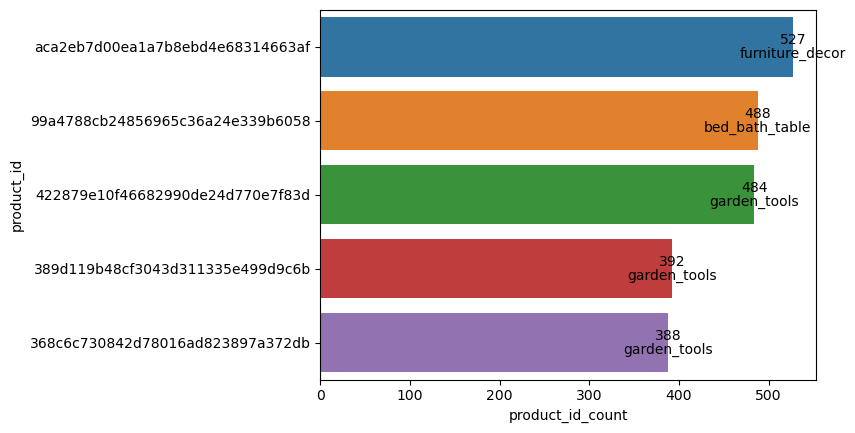

In [ ]:
sns.barplot(data=most_item,x='product_id_count', y='product_id')
for index, row in most_item.iterrows():
    plt.annotate(row['product_id_count'], xy=(row['product_id_count'],row.name), ha='center', va='bottom')
    plt.annotate(row['product_category_name'], xy=(row['product_id_count'],row.name), ha='center', va='top')
plt.show()

In [ ]:
# Objective 2: Perusahaan ingin melihat total penjualan dari tiap kategori product
# Kita bisa melihat total penjualan tiap kategori dengan menjumlahkan nilai terjual pada tabel order item dan mencocokkan kategori produk di tabel products

In [ ]:
case2 = pd.merge(order_item,products,on='product_id',how='left')

In [ ]:
case2 = pd.DataFrame(case2.groupby('product_category_name')['price'].sum().sort_values(ascending=False)).reset_index()


In [ ]:
case2 = case2.rename(columns={'price': 'total_price'})


In [ ]:
case2 = case2.nlargest(10,'total_price')


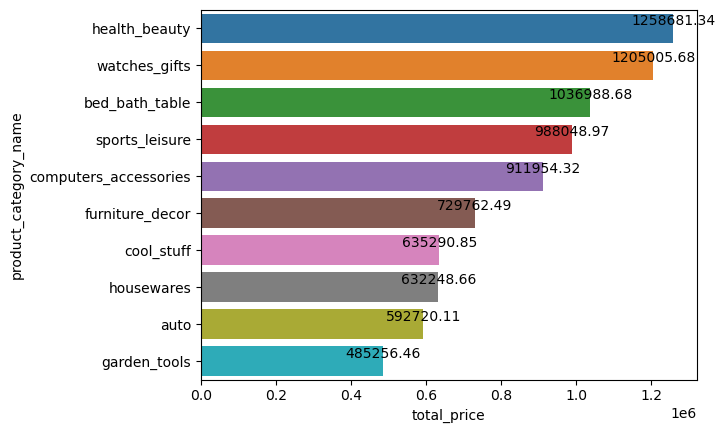

In [ ]:
sns.barplot(data=case2,y='product_category_name', x='total_price')
for index, row in case2.iterrows():
    plt.annotate(row['total_price'], xy=(row['total_price'],row.name), ha='center', va='bottom')
plt.show()